In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pyvis.network import Network
import community as community_louvain
import networkx.algorithms.community as nx_comm

In [2]:
df = pd.read_csv("DATA.csv")

In [3]:
G = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr = "Weight", create_using = nx.Graph())

In [4]:
# plt.figure(figsize=(10,10))
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()

In [5]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
node_degree = dict(G.degree)
#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show("Sample-Valo-Network.html")

Sample-Valo-Network.html


In [6]:
nx_comm.modularity(G, nx_comm.label_propagation_communities(G))

0.7326918252670971

<Axes: >

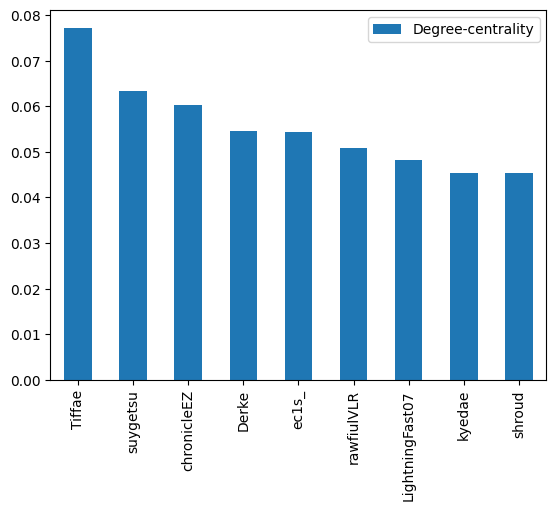

In [7]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['Degree-centrality'])
# Plot top 10 nodes
degree_df.sort_values('Degree-centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

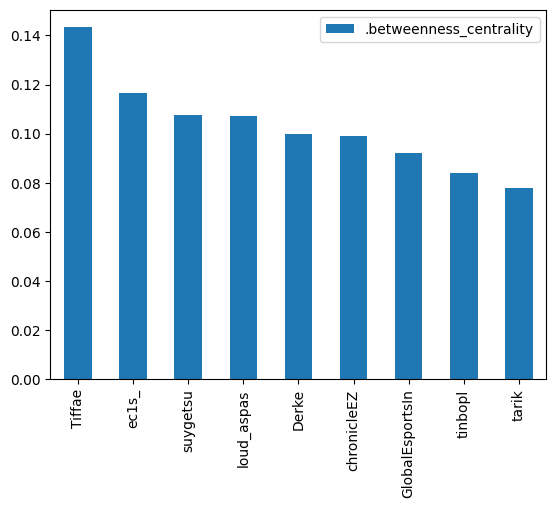

In [8]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['.betweenness_centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('.betweenness_centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

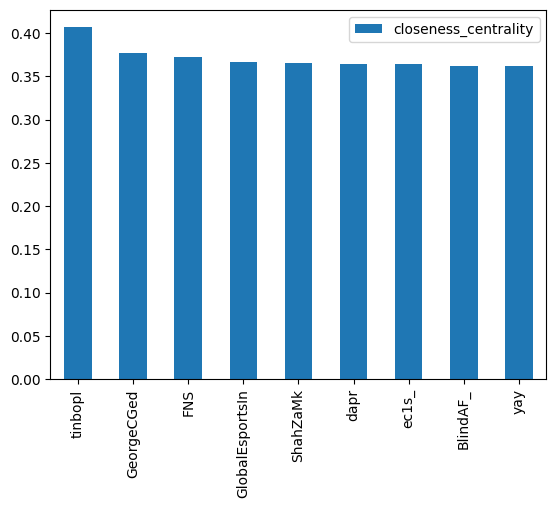

In [9]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['closeness_centrality'])
# Plot top 10 nodes
closeness_df.sort_values('closeness_centrality', ascending=False)[0:9].plot(kind="bar")

In [10]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [11]:
communities = community_louvain.best_partition(G)
communities

{'chronicleEZ': 0,
 'aimefps': 8,
 'kaizeNkvks': 0,
 'LifeSizeYordle4': 8,
 'nahanah45825': 13,
 'Mrchvlr': 4,
 'JeferCastano': 0,
 'akshatgt10': 8,
 'muratyImz': 0,
 'Kah_Jun_': 0,
 'ItsHxrizon': 0,
 'scorpiofire7': 0,
 'dylMri': 0,
 'Dryvennn': 0,
 'norbinh0': 0,
 'denkai_fps': 8,
 'HuntsVAL': 0,
 '_emmaaaaaan': 0,
 'fktears': 0,
 'yiyeie': 0,
 'Glares1x': 0,
 'freedom_Xll': 0,
 'ryugosei': 0,
 'unicyyyyy': 0,
 'Omaiima11': 0,
 'Raphtasa': 0,
 'milquetoastiest': 0,
 'Palefadiidn': 0,
 'officialjxxstin': 8,
 'Mvuse22': 0,
 'tautale_d': 0,
 'pickleeval': 8,
 'kiraibtw': 8,
 'wishesfps': 0,
 'IgorTomas1209': 0,
 'yukitai45666': 13,
 'gmailjjkk': 4,
 'whccpee': 0,
 'TajanaTomic': 0,
 'Rose4_vl': 0,
 'PhlhnH': 13,
 'kek_simo': 0,
 'goflytothemoon': 0,
 's18_m15': 8,
 'Mckillop_AJ': 0,
 'd_koreth': 0,
 'B0n3es___': 0,
 'vj_kalin': 0,
 'spg1H5EiUQxppcv': 0,
 'LeviusL': 0,
 'RetroNicoXoXo': 0,
 'MyleszXx': 0,
 'Adialfakhri': 0,
 'V1R4V': 10,
 'Eoa7L': 0,
 'HeyItsQan': 0,
 'alexmarciio': 0,
 

In [12]:
nx.set_node_attributes(G, communities, 'group')
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("Valorant-Communties-Louvain.html")

Valorant-Communties-Louvain.html
